## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9956526	total: 48.5ms	remaining: 48.5s
1:	learn: 0.9762239	total: 49.6ms	remaining: 24.8s
2:	learn: 0.9559352	total: 50.8ms	remaining: 16.9s
3:	learn: 0.9379227	total: 52ms	remaining: 13s
4:	learn: 0.9170563	total: 53.1ms	remaining: 10.6s
5:	learn: 0.9032334	total: 54.2ms	remaining: 8.98s
6:	learn: 0.8877069	total: 55.3ms	remaining: 7.84s
7:	learn: 0.8704279	total: 56.3ms	remaining: 6.98s
8:	learn: 0.8539304	total: 57.3ms	remaining: 6.3s
9:	learn: 0.8363641	total: 58.3ms	remaining: 5.77s
10:	learn: 0.8204864	total: 59.3ms	remaining: 5.33s
11:	learn: 0.8044728	total: 60.3ms	remaining: 4.97s
12:	learn: 0.7882009	total: 61.3ms	remaining: 4.66s
13:	learn: 0.7729076	total: 62.4ms	remaining: 4.39s
14:	learn: 0.7599406	total: 63.4ms	remaining: 4.16s
15:	learn: 0.7457319	total: 64.4ms	remaining: 3.96s
16:	learn: 0.7338870	total: 65.4ms	remaining: 3.78s
17:	learn: 0.7206018	total: 66.4ms	remaining: 3.62s
18:	learn: 0.7080001	total: 67.3ms	remaining: 3.48

92:	learn: 0.3182693	total: 144ms	remaining: 1.4s
93:	learn: 0.3159012	total: 145ms	remaining: 1.4s
94:	learn: 0.3141968	total: 146ms	remaining: 1.39s
95:	learn: 0.3127825	total: 147ms	remaining: 1.39s
96:	learn: 0.3114039	total: 148ms	remaining: 1.38s
97:	learn: 0.3094799	total: 149ms	remaining: 1.38s
98:	learn: 0.3077395	total: 150ms	remaining: 1.37s
99:	learn: 0.3060987	total: 151ms	remaining: 1.36s
100:	learn: 0.3044234	total: 153ms	remaining: 1.36s
101:	learn: 0.3025964	total: 154ms	remaining: 1.35s
102:	learn: 0.3009602	total: 155ms	remaining: 1.35s
103:	learn: 0.2989786	total: 156ms	remaining: 1.34s
104:	learn: 0.2980193	total: 157ms	remaining: 1.33s
105:	learn: 0.2965799	total: 158ms	remaining: 1.33s
106:	learn: 0.2947991	total: 159ms	remaining: 1.32s
107:	learn: 0.2925134	total: 160ms	remaining: 1.32s
108:	learn: 0.2911645	total: 161ms	remaining: 1.31s
109:	learn: 0.2896218	total: 162ms	remaining: 1.31s
110:	learn: 0.2881442	total: 163ms	remaining: 1.3s
111:	learn: 0.2865554	t

222:	learn: 0.2000123	total: 280ms	remaining: 975ms
223:	learn: 0.1995768	total: 281ms	remaining: 974ms
224:	learn: 0.1991282	total: 282ms	remaining: 973ms
225:	learn: 0.1988763	total: 284ms	remaining: 972ms
226:	learn: 0.1984243	total: 285ms	remaining: 970ms
227:	learn: 0.1979642	total: 286ms	remaining: 969ms
228:	learn: 0.1973530	total: 287ms	remaining: 967ms
229:	learn: 0.1971219	total: 288ms	remaining: 966ms
230:	learn: 0.1966845	total: 290ms	remaining: 964ms
231:	learn: 0.1961833	total: 291ms	remaining: 962ms
232:	learn: 0.1957567	total: 292ms	remaining: 960ms
233:	learn: 0.1952590	total: 293ms	remaining: 959ms
234:	learn: 0.1949362	total: 294ms	remaining: 957ms
235:	learn: 0.1943602	total: 295ms	remaining: 955ms
236:	learn: 0.1939241	total: 296ms	remaining: 953ms
237:	learn: 0.1934773	total: 297ms	remaining: 952ms
238:	learn: 0.1928960	total: 298ms	remaining: 950ms
239:	learn: 0.1922522	total: 300ms	remaining: 949ms
240:	learn: 0.1917263	total: 301ms	remaining: 947ms
241:	learn: 

339:	learn: 0.1547051	total: 409ms	remaining: 793ms
340:	learn: 0.1542990	total: 410ms	remaining: 792ms
341:	learn: 0.1540603	total: 411ms	remaining: 791ms
342:	learn: 0.1536759	total: 412ms	remaining: 790ms
343:	learn: 0.1531405	total: 413ms	remaining: 788ms
344:	learn: 0.1528146	total: 414ms	remaining: 787ms
345:	learn: 0.1526199	total: 415ms	remaining: 785ms
346:	learn: 0.1523344	total: 417ms	remaining: 784ms
347:	learn: 0.1520902	total: 418ms	remaining: 782ms
348:	learn: 0.1516047	total: 419ms	remaining: 781ms
349:	learn: 0.1513768	total: 420ms	remaining: 779ms
350:	learn: 0.1511193	total: 421ms	remaining: 778ms
351:	learn: 0.1509891	total: 422ms	remaining: 776ms
352:	learn: 0.1505476	total: 423ms	remaining: 775ms
353:	learn: 0.1501941	total: 424ms	remaining: 773ms
354:	learn: 0.1501036	total: 425ms	remaining: 772ms
355:	learn: 0.1496627	total: 426ms	remaining: 770ms
356:	learn: 0.1495718	total: 427ms	remaining: 769ms
357:	learn: 0.1493312	total: 428ms	remaining: 767ms
358:	learn: 

469:	learn: 0.1211858	total: 543ms	remaining: 612ms
470:	learn: 0.1209872	total: 544ms	remaining: 611ms
471:	learn: 0.1208972	total: 545ms	remaining: 610ms
472:	learn: 0.1206069	total: 546ms	remaining: 608ms
473:	learn: 0.1205204	total: 547ms	remaining: 607ms
474:	learn: 0.1201499	total: 548ms	remaining: 606ms
475:	learn: 0.1198507	total: 549ms	remaining: 605ms
476:	learn: 0.1196873	total: 550ms	remaining: 603ms
477:	learn: 0.1195305	total: 551ms	remaining: 602ms
478:	learn: 0.1193061	total: 553ms	remaining: 601ms
479:	learn: 0.1190279	total: 554ms	remaining: 600ms
480:	learn: 0.1187952	total: 555ms	remaining: 599ms
481:	learn: 0.1186340	total: 556ms	remaining: 597ms
482:	learn: 0.1184643	total: 557ms	remaining: 596ms
483:	learn: 0.1181829	total: 558ms	remaining: 595ms
484:	learn: 0.1178323	total: 559ms	remaining: 593ms
485:	learn: 0.1177307	total: 560ms	remaining: 592ms
486:	learn: 0.1174512	total: 561ms	remaining: 591ms
487:	learn: 0.1173596	total: 562ms	remaining: 589ms
488:	learn: 

597:	learn: 0.0968711	total: 676ms	remaining: 455ms
598:	learn: 0.0966561	total: 677ms	remaining: 453ms
599:	learn: 0.0964664	total: 678ms	remaining: 452ms
600:	learn: 0.0963202	total: 680ms	remaining: 451ms
601:	learn: 0.0962907	total: 680ms	remaining: 450ms
602:	learn: 0.0960272	total: 681ms	remaining: 449ms
603:	learn: 0.0958713	total: 682ms	remaining: 447ms
604:	learn: 0.0955914	total: 683ms	remaining: 446ms
605:	learn: 0.0954737	total: 685ms	remaining: 445ms
606:	learn: 0.0952806	total: 686ms	remaining: 444ms
607:	learn: 0.0951249	total: 687ms	remaining: 443ms
608:	learn: 0.0949607	total: 688ms	remaining: 441ms
609:	learn: 0.0948211	total: 689ms	remaining: 440ms
610:	learn: 0.0946446	total: 690ms	remaining: 439ms
611:	learn: 0.0944239	total: 691ms	remaining: 438ms
612:	learn: 0.0942916	total: 692ms	remaining: 437ms
613:	learn: 0.0941621	total: 693ms	remaining: 436ms
614:	learn: 0.0941304	total: 694ms	remaining: 435ms
615:	learn: 0.0940806	total: 695ms	remaining: 433ms
616:	learn: 

728:	learn: 0.0773035	total: 814ms	remaining: 302ms
729:	learn: 0.0772427	total: 815ms	remaining: 301ms
730:	learn: 0.0772091	total: 816ms	remaining: 300ms
731:	learn: 0.0771317	total: 817ms	remaining: 299ms
732:	learn: 0.0769762	total: 818ms	remaining: 298ms
733:	learn: 0.0768015	total: 819ms	remaining: 297ms
734:	learn: 0.0767426	total: 820ms	remaining: 296ms
735:	learn: 0.0766698	total: 821ms	remaining: 294ms
736:	learn: 0.0765472	total: 822ms	remaining: 293ms
737:	learn: 0.0764812	total: 823ms	remaining: 292ms
738:	learn: 0.0763849	total: 824ms	remaining: 291ms
739:	learn: 0.0761859	total: 825ms	remaining: 290ms
740:	learn: 0.0760874	total: 826ms	remaining: 289ms
741:	learn: 0.0760040	total: 827ms	remaining: 288ms
742:	learn: 0.0759742	total: 828ms	remaining: 286ms
743:	learn: 0.0758026	total: 829ms	remaining: 285ms
744:	learn: 0.0756685	total: 830ms	remaining: 284ms
745:	learn: 0.0756348	total: 831ms	remaining: 283ms
746:	learn: 0.0754551	total: 832ms	remaining: 282ms
747:	learn: 

858:	learn: 0.0640184	total: 948ms	remaining: 156ms
859:	learn: 0.0640000	total: 949ms	remaining: 154ms
860:	learn: 0.0639069	total: 950ms	remaining: 153ms
861:	learn: 0.0638821	total: 951ms	remaining: 152ms
862:	learn: 0.0638579	total: 952ms	remaining: 151ms
863:	learn: 0.0637418	total: 953ms	remaining: 150ms
864:	learn: 0.0637286	total: 954ms	remaining: 149ms
865:	learn: 0.0636325	total: 955ms	remaining: 148ms
866:	learn: 0.0636240	total: 957ms	remaining: 147ms
867:	learn: 0.0635643	total: 958ms	remaining: 146ms
868:	learn: 0.0634295	total: 959ms	remaining: 145ms
869:	learn: 0.0634130	total: 960ms	remaining: 143ms
870:	learn: 0.0633224	total: 961ms	remaining: 142ms
871:	learn: 0.0632470	total: 962ms	remaining: 141ms
872:	learn: 0.0631326	total: 963ms	remaining: 140ms
873:	learn: 0.0629887	total: 964ms	remaining: 139ms
874:	learn: 0.0629160	total: 965ms	remaining: 138ms
875:	learn: 0.0627938	total: 966ms	remaining: 137ms
876:	learn: 0.0626582	total: 967ms	remaining: 136ms
877:	learn: 

986:	learn: 0.0544900	total: 1.08s	remaining: 14.3ms
987:	learn: 0.0544098	total: 1.08s	remaining: 13.2ms
988:	learn: 0.0543813	total: 1.08s	remaining: 12.1ms
989:	learn: 0.0543549	total: 1.09s	remaining: 11ms
990:	learn: 0.0543411	total: 1.09s	remaining: 9.88ms
991:	learn: 0.0543150	total: 1.09s	remaining: 8.78ms
992:	learn: 0.0542080	total: 1.09s	remaining: 7.68ms
993:	learn: 0.0541902	total: 1.09s	remaining: 6.59ms
994:	learn: 0.0541625	total: 1.09s	remaining: 5.49ms
995:	learn: 0.0541527	total: 1.09s	remaining: 4.39ms
996:	learn: 0.0541478	total: 1.09s	remaining: 3.29ms
997:	learn: 0.0541373	total: 1.09s	remaining: 2.19ms
998:	learn: 0.0540427	total: 1.1s	remaining: 1.1ms
999:	learn: 0.0539240	total: 1.1s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

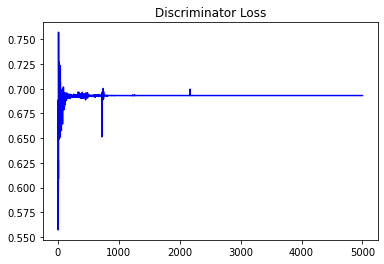

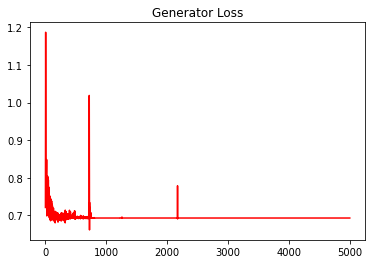

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

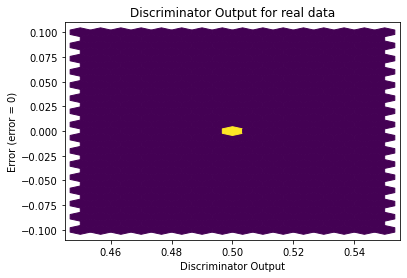

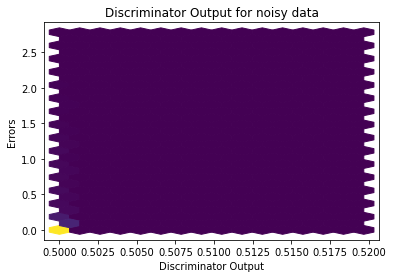

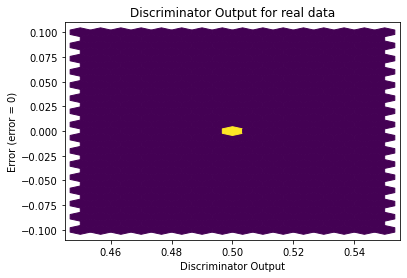

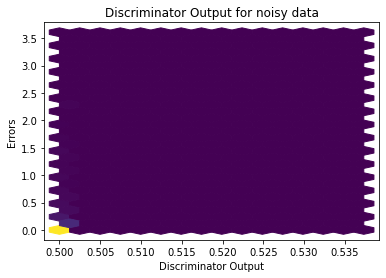

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


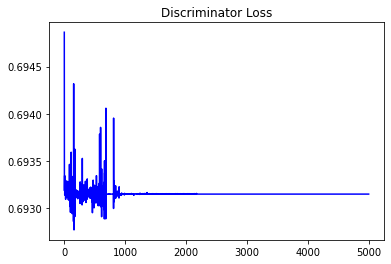

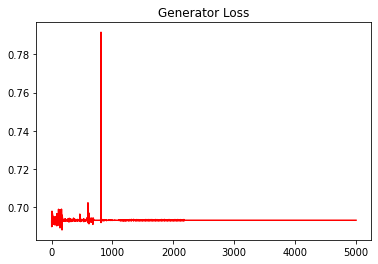

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

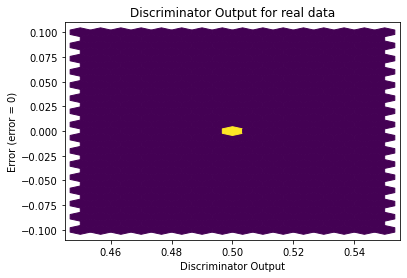

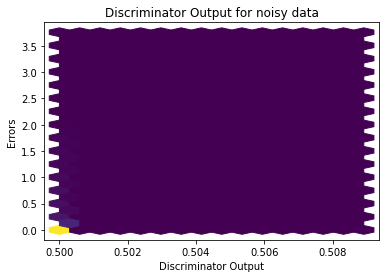

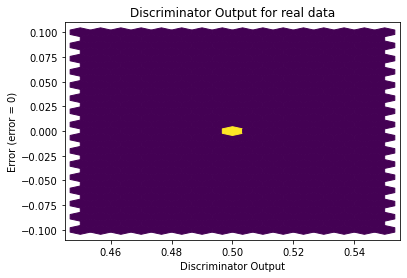

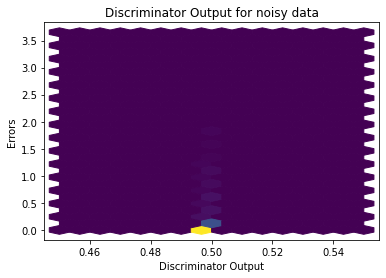

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0237]], device='cuda:0', requires_grad=True)
